# Self-consumption SFH Calculation 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
plt.rcParams["figure.figsize"] = (15,8) #set size of plot
plt.rcParams.update({'font.size': 22})

In [3]:
os.chdir('/home/MA')

In [4]:
total_elec_load = pd.read_pickle('Calculations/Norway/load_Norway_modern_full_retrofit.pkl')

In [5]:
PV_production = pd.read_pickle('Calculations/Norway/PV_production_Norway.pkl')

In [6]:
power_balance = pd.DataFrame()

In [7]:
power_balance['consumption'] = total_elec_load

In [8]:
power_balance['from PV'] = PV_production

In [9]:
power_balance['exchange grid'] = PV_production - total_elec_load

In [10]:
power_balance['to Grid'] = (PV_production - total_elec_load).clip(lower=0)

In [11]:
power_balance['from Grid'] = (total_elec_load - PV_production).clip(lower=0)

In [12]:
power_balance = power_balance.fillna(0)

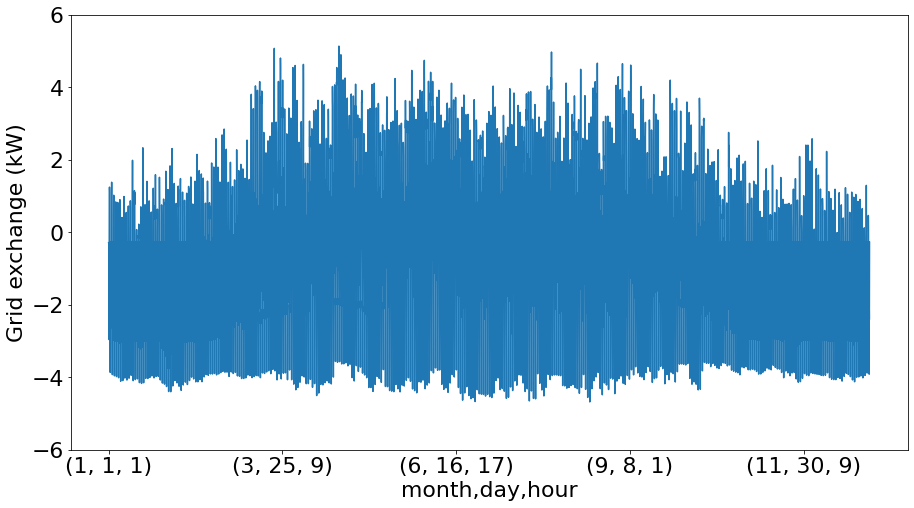

In [13]:
power_balance['exchange grid'].plot(ylabel = 'Grid exchange (kW)', ylim = ([-6, 6]));

In [14]:
power_balance.to_pickle('Calculations/Norway/power_balance_Norway.pkl')

**No storage calculations**

Self-consumption share

In [15]:
sum(power_balance['consumption'] - power_balance['from Grid'])/sum(power_balance['from PV'])

0.4596747774753278

Curtailment calculation

In [16]:
sum(power_balance['to Grid'])/sum(power_balance['from PV'])

0.5403252225246736

PV share without storage

In [17]:
sum(power_balance['consumption'] - power_balance['from Grid'])/sum(power_balance['consumption'])

0.2700952885100577

## Calculations for homes withouth AC during hot summer periods

In [18]:
total_elec_load = pd.read_pickle('Calculations/Norway/load_Norway_modern_full_retrofit_no_AC.pkl')

In [19]:
power_balance = pd.DataFrame()

In [20]:
power_balance['consumption'] = total_elec_load

In [21]:
power_balance['from PV'] = PV_production

In [22]:
power_balance['exchange grid'] = PV_production - total_elec_load

In [23]:
power_balance['to Grid'] = (PV_production - total_elec_load).clip(lower=0)

In [24]:
power_balance['from Grid'] = (total_elec_load - PV_production).clip(lower=0)

In [25]:
power_balance = power_balance.fillna(0)

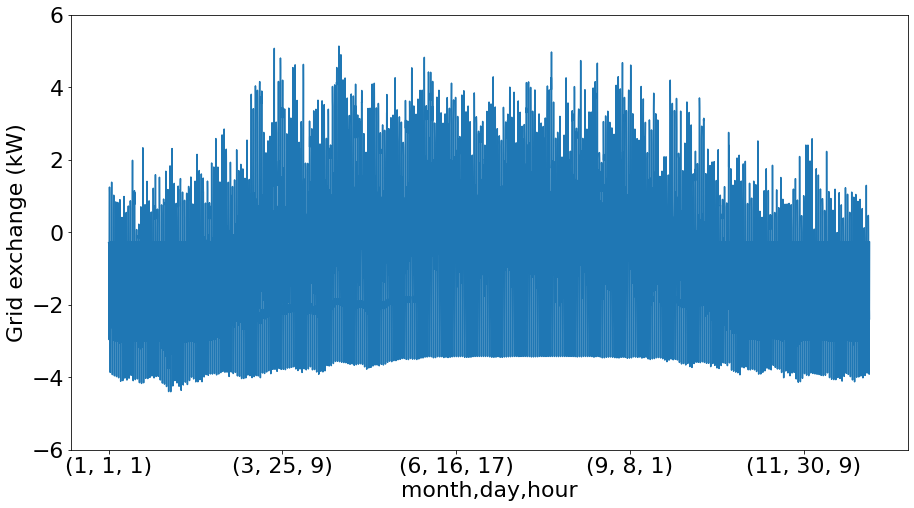

In [26]:
power_balance['exchange grid'].plot(ylabel = 'Grid exchange (kW)', ylim = ([-6, 6]));

In [27]:
power_balance.to_pickle('Calculations/Norway/power_balance_Norway_no_AC.pkl')

**No storage calculations**

Self-consumption share

In [28]:
sum(power_balance['consumption'] - power_balance['from Grid'])/sum(power_balance['from PV'])

0.41444921407681956

Curtailment calculation

In [29]:
sum(power_balance['to Grid'])/sum(power_balance['from PV'])

0.5855507859231791

PV share without storage

In [30]:
sum(power_balance['consumption'] - power_balance['from Grid'])/sum(power_balance['consumption'])

0.2705232509591585